### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk import word_tokenize
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_rows',600)

In [4]:
df = pd.read_csv('final_df_v2.csv', index_col='Unnamed: 0')

In [5]:
df

,name,rating,review_date,reviewer,review_url,neighborhood,cuisine,recommendations,review
0,Hanon,2 star,2019-05-21,Pete Wells,https://www.nytimes.com/2019/05/21/dining/hano...,Williamsburg,Japanese,Japanese omelet; fried chicken with spice; ric...,"Hanon, a new udon shop in Williamsburg, Brookl..."
1,Del Posto,3 star,2019-05-14,Pete Wells,https://www.nytimes.com/2019/05/14/dining/del-...,Chelsea,Italian,Grilled salsify salad; vitello tonnato; minest...,"More than a year ago, I was on the verge of re..."
2,The Freakin Rican,1 star,2019-05-07,Pete Wells,https://www.nytimes.com/2019/05/07/dining/the-...,Astoria,"Caribbean, Latin American",Alcapurrias; pasteles; bacalaitos; chicharrone...,It is true that the bacalaitos at the Freakin ...
3,Wayan,2 star,2019-04-23,Pete Wells,https://www.nytimes.com/2019/04/23/dining/waya...,NoLIta,Indonesian,Hearts-of-palm salad; clams Jimbaran style; av...,If you ate at Spice Market before it closed tw...
4,Niche,1 star,2019-04-16,Pete Wells,https://www.nytimes.com/2019/04/16/dining/nich...,Lower East Side,Japanese,Avocado crunch; yuzu scallop crudo; umami komb...,"In 2012 and 2013, when people were lining up a..."
5,Haenyeo,2 star,2019-04-09,Pete Wells,https://www.nytimes.com/2019/04/09/dining/haen...,Park Slope,Korean,"Crispy chicken wings; zucchini, perilla leaf a...",Looking around Haenyeo’s dining room one night...
6,Standard Grill,2 star,2019-04-02,Pete Wells,https://www.nytimes.com/2019/04/02/dining/stan...,West Village,American,Peconic Bay scallops and uni; wild yellowfin t...,I’m starting to think the American cult of che...
7,Violet,1 star,2019-03-26,Pete Wells,https://www.nytimes.com/2019/03/26/dining/viol...,East Village,"Italian, Pizza",Pimentón bacalao; smoked mackerel pâté; grille...,When I left my home state of Rhode Island at 1...
8,Odo,3 star,2019-03-19,Pete Wells,https://www.nytimes.com/2019/03/19/dining/odo-...,Flatiron district,Japanese,The set menus change monthly and offer few cho...,Before I tell you about the seasonally attuned...
9,Cka Ka Qellu,2 star,2019-03-12,Pete Wells,https://www.nytimes.com/2019/03/12/dining/cka-...,Belmont,Eastern European,Pickled pepper; sausage dip; tarator; kajmak; ...,The best way to enter the Albanian restaurant ...


In [12]:
df.dropna(subset=['review','rating'], inplace=True)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
bad_str_1 = 'Follow NYT Food on Twitter and NYT Cooking on Instagram, Facebook, YouTube and Pinterest.'
bad_str_2 = 'Get regular updates from NYT Cooking, with recipe suggestions, cooking tips and shopping advice.'
bad_str_3 = 'What the stars mean: (None) Poor to Satisfactory * Good ** Very Good *** Excellent ****' 
bad_str_4 = 'Extraordinary Ratings reflect the reviewer\'s reaction primarily to food, with ambiance and service taken into consideration.' 
bad_str_5 = 'Menu listings and prices are subject to change.'
bad_str_6 = 'Extraordinary Ratings reflect the reviewer\'s reaction to food, ambiance and service with price taken into consideration.'
bad_str_7 = 'ON THE WEB PAST REVIEWS from the New York Times, with additional capsule reviews by Times critics: nytimes.com/dining'

def del_bad_str(review):
    
    for string in [bad_str_1, bad_str_2, bad_str_3, bad_str_4, bad_str_5, bad_str_6, bad_str_7]:
        
        if string in review:
            
            review = review.replace(string, '').strip()
    
    return review


In [16]:
df['review'] = df['review'].apply(lambda x: del_bad_str(x))

In [17]:
reviews = df[['review','rating']].copy()

In [18]:
reviews['rating'].unique()

array(['2 star', '3 star', '1 star', '0.5 star', '0.75 star', '4 star',
       '0.25 star', '★', '★★', 'Satisfactory', '★★★', 'Fair', '★★★★',
       'Poor'], dtype=object)

In [19]:
reviews['rating'].value_counts()

2 star          227
1 star          193
★                81
★★               74
3 star           56
★★★              19
0.75 star        18
0.5 star          9
Satisfactory      8
Fair              8
★★★★              4
4 star            4
0.25 star         3
Poor              1
Name: rating, dtype: int64

In [20]:
def categorize(rating):
    if rating in ['0.25 star', '0.5 star', '0.75 star', 'Fair', 'Satisfactory', 'Poor', 'SATISFACTORY']:
        return '0 star'
    elif rating in ['1 star', '★']:
        return '★'
    elif rating in ['2 star','★★']:
        return '★★'
    else:
        return '★★★'

In [21]:
reviews['new_rate'] = reviews['rating'].apply(lambda x: categorize(x))

In [22]:
reviews.head()

,review,rating,new_rate
0,"Hanon, a new udon shop in Williamsburg, Brookl...",2 star,★★
1,"More than a year ago, I was on the verge of re...",3 star,★★★
2,It is true that the bacalaitos at the Freakin ...,1 star,★
3,If you ate at Spice Market before it closed tw...,2 star,★★
4,"In 2012 and 2013, when people were lining up a...",1 star,★


In [23]:
reviews['new_rate'].unique()

array(['★★', '★★★', '★', '0 star'], dtype=object)

In [24]:
reviews['new_rate'].value_counts()

★★        301
★         274
★★★        83
0 star     47
Name: new_rate, dtype: int64

# TF-IDF

In [25]:
X = reviews['review'].copy()
y = reviews['new_rate'].copy()

In [26]:
def tfidf(X, y,  stopwords_list): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    Parameters
    ----------
    X: pandas.Series object
        Pandas series of text documents to classify 
    y : pandas.Series object
        Pandas series containing label for each document
    stopwords_list: list ojbect
        List containing words and punctuation to remove. 
    Returns
    --------
    tf_idf_train :  sparse matrix, [n_train_samples, n_features]
        Vector representation of train data
    tf_idf_test :  sparse matrix, [n_test_samples, n_features]
        Vector representation of test data
    y_train : array-like object
        labels for training data
    y_test : array-like object
        labels for testing data
    vectorizer : vectorizer object
        fit TF-IDF vecotrizer object

    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    vec = TfidfVectorizer(stop_words=stopwords_list)
    
    tf_idf_train = vec.fit_transform(X_train)
    tf_idf_test = vec.transform(X_test)
    
    return tf_idf_train, tf_idf_test, y_train, y_test, vec


In [27]:
stopwords_list = stopwords.words('english') + list(string.punctuation)

In [28]:
X_train, X_test, y_train, y_test, vec = tfidf(X, y,  stopwords_list)

# Classification Baseline Models - Naive Bayes & Random Forrest

In [29]:
#create a function that takes in a classifier and trains it on our tf-idf vectors and generates test and train predictiions
def classify_text(classifier, tf_idf_train, tf_idf_test, y_train):
    '''
    Train a classifier to identify whether a message is spam or ham
    
    Parameters
    ----------
    classifier: sklearn classifier
       initialized sklearn classifier (MultinomialNB, RandomForestClassifier, etc.)
    tf_idf_train : sparse matrix, [n_train_samples, n_features]
        TF-IDF vectorization of train data
    tf_idf_test : sparse matrix, [n_test_samples, n_features]
        TF-IDF vectorization of test data
    y_train : pandas.Series object
        Pandas series containing label for each document in the train set
    Returns
    --------
    train_preds :  list object
        Predictions for train data
    test_preds :  list object
        Predictions for test data
    '''
    #fit the classifier with our training data
    classifier.fit(tf_idf_train, y_train)
    
    #predict the labels of our train data and store them in train_preds
    train_preds = classifier.predict(tf_idf_train)

    #predict the labels of our test data and store them in test_preds
    test_preds = classifier.predict(tf_idf_test)
    
    return train_preds, test_preds

In [30]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

## Naive Bayes

In [31]:
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,X_train, X_test, y_train)

In [32]:
print(confusion_matrix(y_train, nb_train_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_train, nb_train_preds))

[[  0   2  36   0]
 [  0 169  32   0]
 [  0   0 225   0]
 [  0   0  64   0]]
0.7462121212121212


In [33]:
print(confusion_matrix(y_test, nb_test_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_test, nb_test_preds))

[[ 0  0  9  0]
 [ 0  0 73  0]
 [ 0  0 76  0]
 [ 0  0 19  0]]
0.4293785310734463


## Random Forrest

In [34]:
#generate predictions for Random Forest Classifier
rf_train_preds, rf_test_preds = classify_text(rf_classifier,X_train, X_test, y_train)

In [35]:
print(confusion_matrix(y_train, rf_train_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_train, rf_train_preds))

[[ 38   0   0   0]
 [  0 201   0   0]
 [  0   0 225   0]
 [  0   0   0  64]]
1.0


In [36]:
print(confusion_matrix(y_test, rf_test_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_test, rf_test_preds))

[[ 0  7  2  0]
 [ 0 46 27  0]
 [ 0 28 48  0]
 [ 0  6 13  0]]
0.5310734463276836


# EDA based on baseline

In [37]:
vec.get_feature_names()

['00',
 '000',
 '0000',
 '0003',
 '0005',
 '0012',
 '0020',
 '0030',
 '0033',
 '0050',
 '0082',
 '0085',
 '0100',
 '0101',
 '0105',
 '02',
 '0200',
 '0202',
 '0211',
 '0215',
 '0220',
 '0221',
 '0228',
 '0233',
 '0242',
 '0271',
 '03',
 '0300',
 '0303',
 '0327',
 '0350',
 '0400',
 '0404',
 '0412',
 '0470',
 '05',
 '0505',
 '0553',
 '0555',
 '0606',
 '0665',
 '07',
 '0700',
 '08',
 '0808',
 '0812',
 '0820',
 '0844',
 '0880',
 '0905',
 '0906',
 '0955',
 '0999',
 '10',
 '100',
 '1000',
 '1001',
 '1007',
 '101',
 '102',
 '103',
 '104',
 '1048',
 '105',
 '106',
 '106th',
 '107',
 '1076',
 '107th',
 '1081',
 '109',
 '1099',
 '10downingnyc',
 '10th',
 '11',
 '110',
 '1100',
 '1105',
 '111',
 '1122',
 '115',
 '116',
 '117',
 '118',
 '119',
 '1191',
 '1196',
 '11th',
 '12',
 '120',
 '121',
 '1220',
 '123',
 '1234',
 '125',
 '1250',
 '128',
 '1288',
 '12th',
 '13',
 '130',
 '1300',
 '1313',
 '1314',
 '132',
 '133',
 '1330',
 '134',
 '135',
 '136',
 '1377',
 '13th',
 '14',
 '140',
 '141',
 '1414'

In [38]:
vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as'

In [42]:
stopwords_list_2 = stopwords.words('english') + list(string.digits) + NYT_stoplist + numbers_stoplist

In [43]:
def tfidf_better(X, y,  stopwords_list): 
    '''
    Generate train and test TF-IDF vectorization for our data set
    
    Parameters
    ----------
    X: pandas.Series object
        Pandas series of text documents to classify 
    y : pandas.Series object
        Pandas series containing label for each document
    stopwords_list: list ojbect
        List containing words and punctuation to remove. 
    Returns
    --------
    tf_idf_train :  sparse matrix, [n_train_samples, n_features]
        Vector representation of train data
    tf_idf_test :  sparse matrix, [n_test_samples, n_features]
        Vector representation of test data
    y_train : array-like object
        labels for training data
    y_test : array-like object
        labels for testing data
    vectorizer : vectorizer object
        fit TF-IDF vecotrizer object

    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    vec = TfidfVectorizer(stop_words=stopwords_list,preprocessor=lambda x: stemmer.stem(x), ngram_range=(1,3))
    
    tf_idf_train = vec.fit_transform(X_train)
    tf_idf_test = vec.transform(X_test)
    
    return tf_idf_train, tf_idf_test, y_train, y_test, vec


In [44]:
X_train2, X_test2, y_train2, y_test2, vect = tfidf(X, y,  stopwords_list_2)

In [45]:
vect.get_feature_names()

['0003',
 '0012',
 '0020',
 '0033',
 '0085',
 '0100',
 '02',
 '0202',
 '0211',
 '0215',
 '0221',
 '0228',
 '0300',
 '0400',
 '0412',
 '0470',
 '0606',
 '0700',
 '08',
 '0844',
 '0880',
 '0955',
 '106th',
 '107th',
 '10downingnyc',
 '10th',
 '11th',
 '12th',
 '13th',
 '14th',
 '15th',
 '16th',
 '17th',
 '18th',
 '190a',
 '1920s',
 '1930s',
 '1940s',
 '1950s',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '19th',
 '2000s',
 '2020',
 '20s',
 '20th',
 '2100',
 '2121',
 '2130',
 '2170',
 '21st',
 '2214',
 '2222',
 '2233',
 '2263',
 '2277',
 '22nd',
 '2300',
 '2322',
 '2328',
 '2330',
 '2343',
 '23rd',
 '2400',
 '2426',
 '2444',
 '24th',
 '2500',
 '2523',
 '2590',
 '2600',
 '2626',
 '2644',
 '2680',
 '26th',
 '2722',
 '2742',
 '2777',
 '2778',
 '27th',
 '2828',
 '28th',
 '2900',
 '2911',
 '2929',
 '2950',
 '2953',
 '29th',
 '3000',
 '3030',
 '3088',
 '3090',
 '30a',
 '30s',
 '30th',
 '31st',
 '3214',
 '32d',
 '32nd',
 '3330',
 '3333',
 '3345',
 '3369',
 '3399',
 '33rd',
 '3400',
 '3470',
 '3500',

In [47]:
#generate predictions for Naive Bayes Classifier
nb_train_preds, nb_test_preds = classify_text(nb_classifier,X_train, X_test, y_train)

print(confusion_matrix(y_train, nb_train_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_train, nb_train_preds))

[[  0   2  36   0]
 [  0 169  32   0]
 [  0   0 225   0]
 [  0   0  64   0]]
0.7462121212121212


In [48]:
print(confusion_matrix(y_test, nb_test_preds, labels=['0 star','★','★★', '★★★']))
print(accuracy_score(y_test, nb_test_preds))

[[ 0  0  9  0]
 [ 0  0 73  0]
 [ 0  0 76  0]
 [ 0  0 19  0]]
0.4293785310734463


# Preprocessing Pipeline

In [49]:
from nltk.tokenize import WhitespaceTokenizer

In [50]:
from nltk.stem import LancasterStemmer, SnowballStemmer, RegexpStemmer, WordNetLemmatizer 

In [51]:
stemmer = SnowballStemmer('english')

In [52]:
token = WhitespaceTokenizer()

In [53]:
stopwords_list_3 = stopwords.words('english') + list(string.digits) + NYT_stoplist + numbers_stoplist

In [46]:
NYT_stoplist = ['follow','NYT','nyt','food','twitter','cooking','instagram','facebook','youtube','pinterest','Cooking',
 'recipe','suggestions','cooking','tips','shopping','advice','food', 'restaurant', '00',
 '000','0000','0005','0008','0030','0050','0082','0101','0105','0200','0220','0233','0242','0271','03','0303','0327',
 '0350','0404', '05', '0505', '0553', '0555', '0665', '07', '0808', '0812', '0820', '0905', '0906', '0999', 'street', 
 'ave','★','*','atmosphere','sound','wine','list','am','pm', 'daily', 'monday','tuesday','wednesday','thursday',
 'friday','saturday','sunday','hours','wheelchair','access','0003', '0012', '0020', '0033', '0085', '0100', '02',
 '0202', '0211', '0215', '0221', '0228', '0300', '0400', '0412', '0470', '0606', '0700', '08', '0844', '0880', '0955']

In [41]:
numbers_stoplist = [str(x) for x in range(0,2020)]

In [54]:
def make_tokens(review, token):
    tokenized_review = token.tokenize(review)
    return tokenized_review

In [55]:
def lower(tokenized_review):
    lowercase_tokens = [token.lower() for token in tokenized_review]
    return lowercase_tokens

In [56]:
def remove_punc(lowercase_tokens):
    stripped_tokens = [token.translate(str.maketrans('', '', string.punctuation)) for token in lowercase_tokens]
    return stripped_tokens

In [57]:
def remove_stopwords(stripped_tokens, stopwords_list):
    stopped_tokens = [token for token in stripped_tokens if token not in stopwords_list]
    return stopped_tokens

In [58]:
def stem_tokens(stopped_tokens, stemmer):
    stems = [stemmer.stem(token) for token in stopped_tokens]
    return stems

In [90]:
def normalize(review, stopword_list, stemmer, token):
    tokens = make_tokens(review, token)
    lower_tokens = lower(tokens)
    no_punc = remove_punc(lower_tokens)
    stopped = remove_stopwords(no_punc, stopword_list)
    stems = stem_tokens(stopped, stemmer)
    return stems

# EDA and Cleaning DF

In [61]:
df['rating'] = df['rating'].apply(lambda x: categorize(x))

In [91]:
df['review'] = df['review'].apply(lambda x: normalize(x, stopwords_list_3, stemmer, token))

In [97]:
# Number of unique words
df['vocabulary'] = df['review'].apply(lambda x: len(set(x)))

In [109]:
# Number of total words
df['num_tokens'] = df['review'].apply(lambda x: len(x))

In [64]:
df.drop(['cuisine','recommendations'], axis=1, inplace=True)

In [87]:
df['neighborhood'].nunique()

70

In [88]:
df.groupby('neighborhood').count()['rating'].sort_values(ascending=False).index

Index(['West Village', 'East Village', 'Midtown', 'Midtown East', 'TriBeCa',
       'Upper East Side', 'Chelsea', 'Upper West Side', 'SoHo', 'Flatiron',
       'Lower East Side', 'Greenwich Village', 'Midtown South', 'Williamsburg',
       'NoHo', 'Times Square Theatre District', 'Nolita', 'Kips Bay',
       'Clinton', 'NoMad', 'Long Island City', 'Flushing',
       'Financial District', 'Gramercy Park', 'Chinatown', 'Park Slope',
       'Union Square', 'Greenpoint', 'Murray Hill', 'Koreatown', 'Gowanus',
       'Prospect Heights', 'Red Hook', 'Harlem', 'Carroll Gardens', 'Bushwick',
       'Crown Heights', 'Battery Park City', 'Hudson Yards', 'Cobble Hill',
       'Boerum Hill', 'Meatpacking District', 'Fort Greene',
       'Park Slope North', 'Columbia Street Waterfront District',
       'Austin, Tex.', 'Coney Island', 'Brooklyn Heights', 'Bay Ridge',
       'Belmont', 'Ditmas', 'College Point', 'Woodside', 'Downtown Brooklyn',
       'Providence, RI', 'Washington D.C.', 'Stapleton',

In [78]:
top_hoods = list(df.groupby('neighborhood').count()['rating'].sort_values(ascending=False)[:19].index)

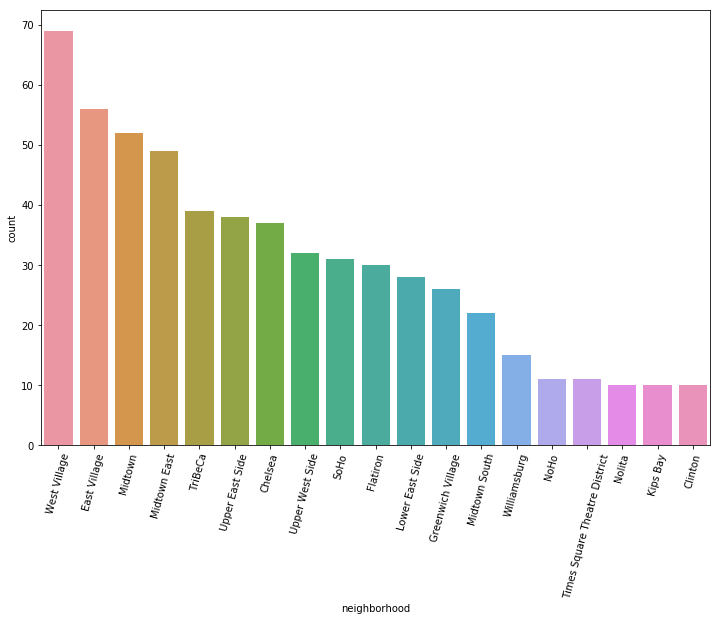

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(df['neighborhood'],order = top_hoods)
plt.xticks(rotation=75);

In [125]:
def hood_to_area(hood):
    if hood in ['West Village', 'East Village', 'TriBeCa','SoHo', 'Lower East Side', 'Greenwich Village',
                'NoHo', 'Nolita', 'Financial District', 'Gramercy Park', 'Chinatown', 'Union Square', 
                'Battery Park City', 'Meatpacking District', 'NoLIta', 'Little Italy', 'Hudson Square','Fulton Ferry']:
        return 'Downtown'
    elif hood in ['Midtown', 'Midtown East', 'Midtown South', 'Times Square Theatre District', 'Kips Bay',
                  'Murray Hill', 'Koreatown', 'Hudson Yards','Flatiron district','Flatiron', 'NoMad']:
        return 'Midtown'
    elif hood in ['Upper East Side', 'Upper West Side', 'Harlem']:
        return 'Uptown'
    elif hood in ['Williamsburg','Clinton', 'Park Slope','Greenpoint', 'Gowanus','Prospect Heights', 'Red Hook', 
                  'Carroll Gardens', 'Bushwick', 'Crown Heights', 'Cobble Hill', 'Boerum Hill', 'Fort Greene',
                  'Park Slope North', 'Columbia Street Waterfront District', 'Coney Island', 'Brooklyn Heights', 
                  'Bay Ridge','Ditmas', 'Downtown Brooklyn','Sheepshead Bay', 'Midwood']:
        return 'Brooklyn'
#     elif hood in ['Long Island City', 'Flushing','College Point', 'Woodside','South Ozone Park','Elmhurst', 'Astoria']:
#         return 'Queens'
    else:
        return 'Other'

In [126]:
df['area'] = df['neighborhood'].apply(lambda x: hood_to_area(x))

In [127]:
df['area'].describe()

count          705
unique           5
top       Downtown
freq           302
Name: area, dtype: object

In [128]:
df['area'].value_counts()

Downtown    302
Midtown     193
Uptown       73
Brooklyn     72
Other        65
Name: area, dtype: int64

In [163]:
df_primary = df[(df['reviewer'] == 'Pete Wells')|(df['reviewer'] == 'Frank Bruni')|(df['reviewer'] == 'Sam Sifton')]

In [164]:
df_primary.describe()

,vocabulary,num_tokens
count,615.000000,615.000000
mean,474.907317,657.642276
std,43.410804,69.627573
min,300.000000,420.000000
25%,445.500000,611.000000
50%,471.000000,652.000000
75%,497.500000,692.000000
max,669.000000,1024.000000


In [165]:
df_primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 704
Data columns (total 10 columns):
name            615 non-null object
rating          615 non-null object
review_date     615 non-null object
reviewer        615 non-null object
review_url      615 non-null object
neighborhood    614 non-null object
review          615 non-null object
vocabulary      615 non-null int64
num_tokens      615 non-null int64
area            615 non-null object
dtypes: int64(2), object(8)
memory usage: 52.9+ KB


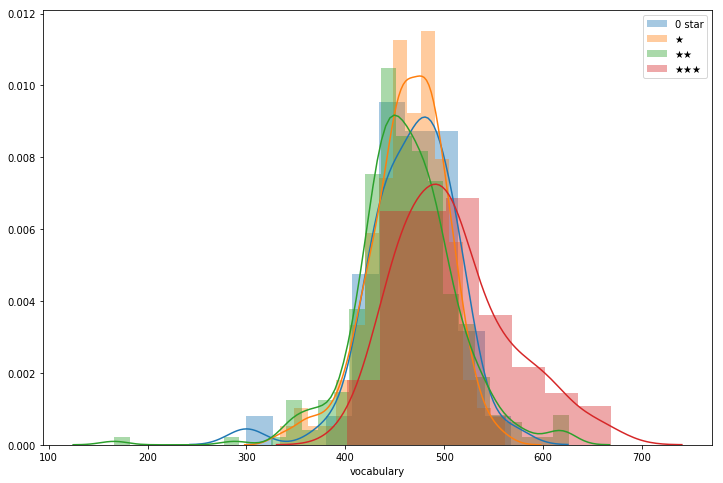

In [107]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['rating']== '0 star']['vocabulary'])
sns.distplot(df[df['rating']== '★']['vocabulary'])
sns.distplot(df[df['rating']== '★★']['vocabulary'])
sns.distplot(df[df['rating']== '★★★']['vocabulary'])
plt.legend(labels=['0 star','★','★★','★★★'])

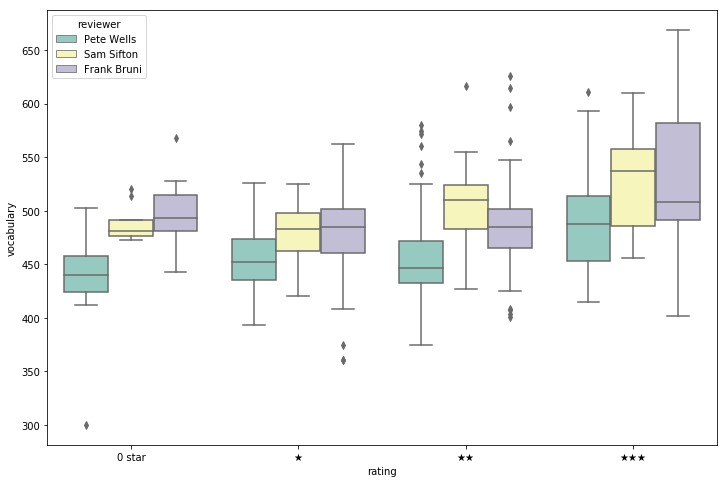

In [167]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df_primary['vocabulary'], x = df_primary['rating'], hue=df_primary['reviewer'], palette ='Set3', order= ['0 star','★','★★','★★★'] )
# plt.legend(labels=['0 star','★','★★','★★★'])

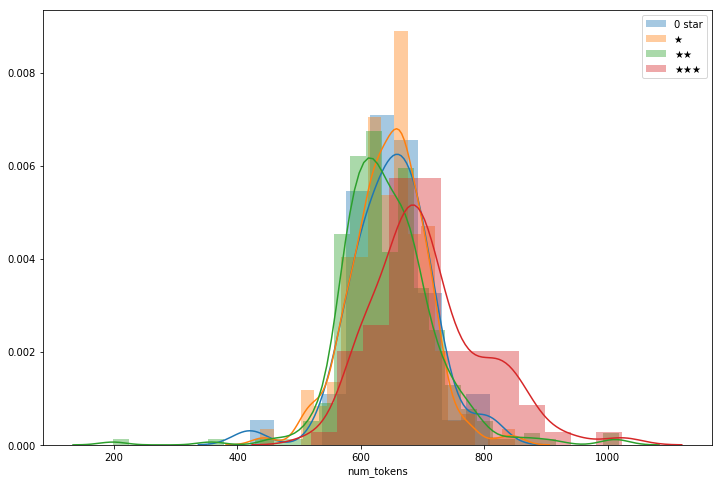

In [111]:
plt.figure(figsize=(12,8))
sns.distplot(df[df['rating']== '0 star']['num_tokens'])
sns.distplot(df[df['rating']== '★']['num_tokens'])
sns.distplot(df[df['rating']== '★★']['num_tokens'])
sns.distplot(df[df['rating']== '★★★']['num_tokens'])
plt.legend(labels=['0 star','★','★★','★★★'])

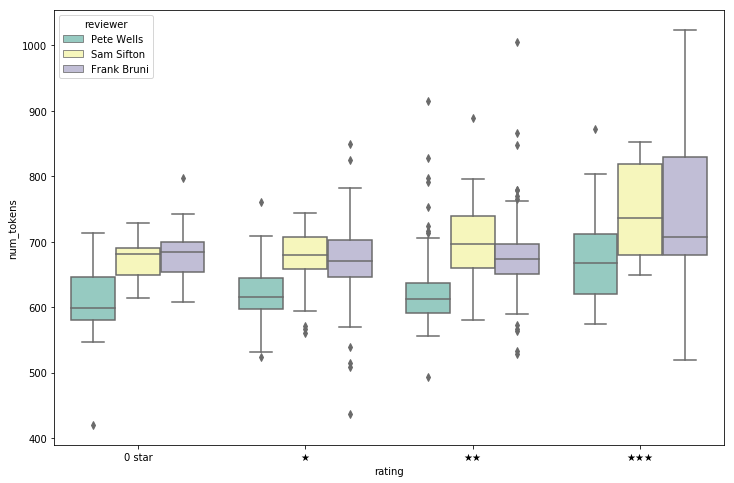

In [168]:
plt.figure(figsize=(12,8))
sns.boxplot(y=df_primary['num_tokens'], x = df_primary['rating'], hue = df_primary['reviewer'],palette ='Set3',order= ['0 star','★','★★','★★★']  )

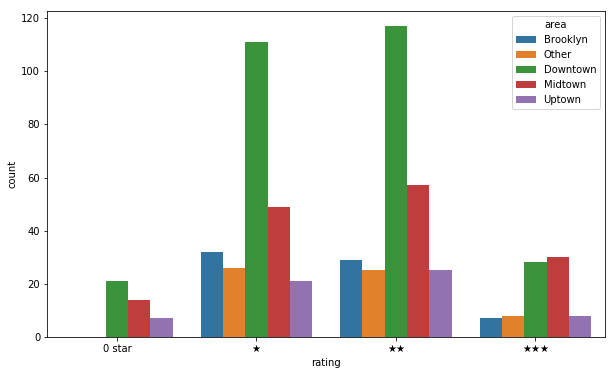

In [172]:
plt.figure(figsize=(10,6))
sns.countplot(df_primary['rating'], hue=df_primary['area'],order= ['0 star','★','★★','★★★'] )

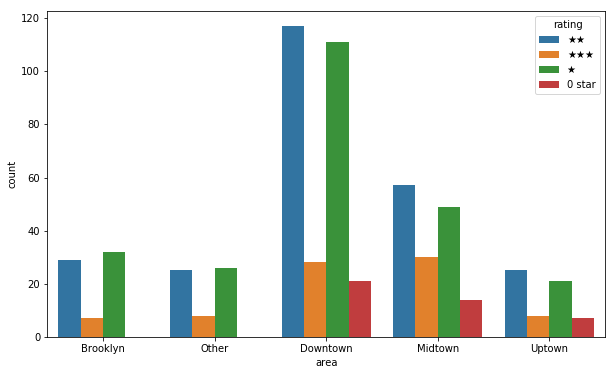

In [173]:
plt.figure(figsize=(10,6))
sns.countplot(df_primary['area'], hue=df_primary['rating'] )